# Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")


In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PTRAT   506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))


# Train Test splitting 

##### problems:
##### 1) seed the random because everytime random runs different test and train splitting is done so our model can learn all data so no test set left to test our model so seed .
##### 2) it could be possible for chas attribute our model could not learn that chas also has 1 not only 0 so had to do stratified shuffling .

In [7]:
#for learning purpose of trian test splitting 
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)#to fix the random so that our model could not see test data also if again random function called in it
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices] , data.iloc[test_indices]
# train_set , test_set = split_train_test(housing , 0.2)
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [8]:
#here normal train test split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2 , random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [9]:
#here stratified shuffle split using chas attribute as reference
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):# this funtion makes and return stratified split between test and train indices
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [10]:
housing = strat_train_set.copy()

In [11]:
# strat_train_set['CHAS'].value_counts()

In [12]:
# housing['CHAS'].value_counts()

In [13]:
# strat_test_set['CHAS'].value_counts()

## Looking for Correlation

In [14]:
# correlation is power of proportionality(dependency) between any two attributes in some quantity -1<corr<1(-1 to 0 for inversely proportional and 0 to 1 for directly...)
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV     1.000000
RM       0.679894
B        0.361761
ZN       0.339741
DIS      0.240451
CHAS     0.205066
AGE     -0.364596
RAD     -0.374693
CRIM    -0.393715
NOX     -0.422873
TAX     -0.456657
INDUS   -0.473516
PTRAT   -0.493534
LSTAT   -0.740494
Name: MEDV, dtype: float64

In [15]:
# from pandas.plotting import scatter_matrix
# attributes = ['MEDV','RM','ZN','LSTAT']
# scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

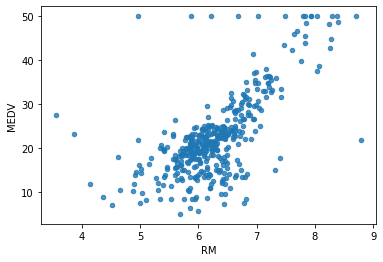

In [16]:
housing.plot(kind='scatter', x='RM' , y='MEDV', alpha = 0.8)

## Trying Combining two Attributes

In [17]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.corr()['MEDV'].sort_values(ascending=False)

MEDV     1.000000
RM       0.679894
B        0.361761
ZN       0.339741
DIS      0.240451
CHAS     0.205066
AGE     -0.364596
RAD     -0.374693
CRIM    -0.393715
NOX     -0.422873
TAX     -0.456657
INDUS   -0.473516
PTRAT   -0.493534
TAXRM   -0.525160
LSTAT   -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

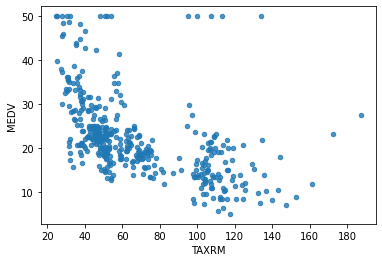

In [18]:
housing.plot(kind='scatter' , x='TAXRM' , y='MEDV' , alpha = 0.8)

## Separating label and data (input and output)  

In [19]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

## scikit learn design

### scikit learn methods types

Three types of objects in scikit learn

1. Estimators - It estimates some parameter based on a dataset . eg . imputer(it manages all empty values in datasets )
fit (estimation) transform(editing the dataset and returning).

2. Transformers - transforms method takes input and returns output based on the learnings from fit(). It also has a convenience funtion called fit_transform() which fits and then transforms at one go.

3. Predictors - LinearRegression model is an example of predictor . it can also used to give score() ( evaluating the  predictions).



Pipeline is a model or block which is used to run multiple times the same code efficiently with some sequence. 

### ml algo works more properly on feature scaled datasets (two types of feature scalling - standard scaler and min max scaling)

## Creating a Pipeline

In [20]:
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scalar', StandardScaler()),
])

In [21]:
housing_num = my_pipeline.fit_transform(housing)

In [22]:
housing_num.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model = LinearRegression()
#model = DecisionTreeRegressor()
model.fit(housing_num , housing_labels)

LinearRegression()

In [24]:
some_data = housing.iloc[:5]


In [25]:
some_labels = housing_labels.iloc[:5]

In [26]:
prepared_data = my_pipeline.transform(some_data)

In [27]:
model.predict(prepared_data)

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [28]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [29]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [30]:
lin_rmse

4.82932149263576

In [43]:
from sklearn.metrics import r2_score

score = r2_score(housing_labels,housing_predictions)
print(f"accuracy : {(score+1)*50}")

accuracy : 86.72908622757956


## Using better evaluation technique (Cross Validation)

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [33]:
rmse_scores

array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,
       4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

In [34]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
    

In [35]:
print_scores(rmse_scores)

Scores:  [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
Mean:  5.030437102767304
Standard deviation:  1.0607661158294834


## Saving the Model


In [36]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model using test set of dataset

In [37]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

4.143819554319328

### So the error of 3.8 is there by using linear regression 

In [38]:
# for loading the model anywhere
# model = load('Dragon.joblib')

In [39]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.49865392, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28660512,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13494109, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.0450661 , -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [40]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034]])

In [41]:
model.predict(features)

array([23.94996896])